In [12]:
# Ensure notebook can import the package by adding the repo root to sys.path
from pathlib import Path
import sys, os

def find_repo_root(marker_names=("uuv_mission","pyproject.toml","setup.py","README.md"), max_up=5):
    p = Path.cwd().resolve()
    for _ in range(max_up+1):
        for name in marker_names:
            if (p / name).exists():
                return p
        if p.parent == p:
            break
        p = p.parent
    return None

repo_root = find_repo_root()
if repo_root is None:
    # Fallback: assume notebook is in repo_root/notebooks
    repo_root = Path.cwd().resolve().parent

repo_root_str = str(repo_root)
if repo_root_str not in sys.path:
    sys.path.insert(0, repo_root_str)
print('Added to sys.path:', repo_root_str)
print('uuv_mission present:', (repo_root / 'uuv_mission').exists())

Added to sys.path: /Users/eliarie/Documents/b1-coding/b1-coding-practical-mt24
uuv_mission present: True


# PD Controller demo
This notebook demonstrates the PD controller with `Mission.from_csv`, `PDController`, and `ClosedLoop`. Activate your `.venv` and select it as the kernel before running.

In [13]:
# Imports and environment check
import numpy as np
import matplotlib.pyplot as plt
from uuv_mission.dynamic import Mission, ClosedLoop, Submarine
from uuv_mission.control import PDController
import sys, os
print('Python executable:', sys.executable)
try:
    import pandas as pd
    print('pandas', pd.__version__)
except Exception as e:
    print('pandas import failed:', e)

Python executable: /Users/eliarie/Documents/b1-coding/b1-coding-practical-mt24/.venv/bin/python
pandas 2.2.3


In [14]:
# Load mission and run simulation
m = Mission.from_csv('../data/mission.csv')
controller = PDController(kp=0.15, kd=0.6, dt=1.0)
plant = Submarine()
cl = ClosedLoop(plant, controller)
traj = cl.simulate_with_random_disturbances(m, variance=0.1)
print('trajectory shape', traj.position.shape)

trajectory shape (100, 2)


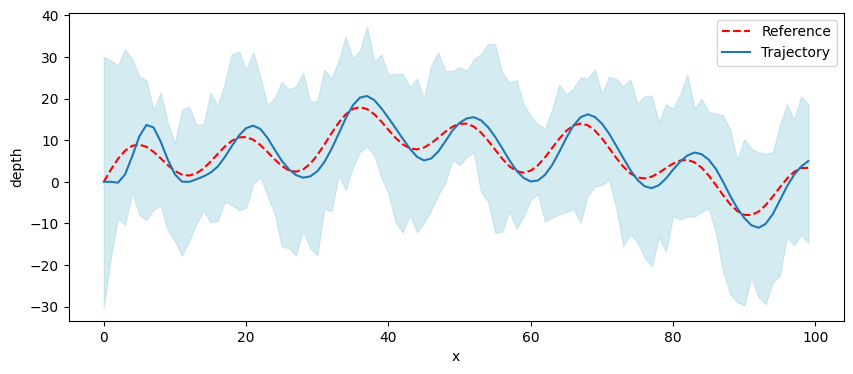

In [15]:
# Plot the completed mission and trajectory
fig, ax = plt.subplots(figsize=(10,4))
x_values = np.arange(len(m.reference))
ax.fill_between(x_values, m.cave_height, m.cave_depth, color='lightblue', alpha=0.5)
ax.plot(m.reference, 'r--', label='Reference')
ax.plot(traj.position[:,0], traj.position[:,1], label='Trajectory')
ax.set_xlabel('x')
ax.set_ylabel('depth')
ax.legend()
plt.show()